In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [5]:
df = pd.read_csv("C:\\Users\\hp\\Desktop\\python scripts\\insurance.csv")

1. *Basic Analysis*: What is the average, minimum, and maximum age of the individuals in the dataset

In [7]:
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:

average_age = df['age'].mean()
min_age = df['age'].min()
max_age = df['age'].max()


print("Average age:", average_age)
print("Minimum age:", min_age)
print("Maximum age:", max_age)


Average age: 39.20702541106129
Minimum age: 18
Maximum age: 64


In [10]:

average_bmi = df['bmi'].mean()


age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)


average_bmi_by_age_group = df.groupby('age_group')['bmi'].mean()


print("Overall average BMI:", average_bmi)
print("Average BMI by age group:")
print(average_bmi_by_age_group)


Overall average BMI: 30.66339686098655
Average BMI by age group:
age_group
<20      30.087018
20-30    29.773579
30-40    30.399864
40-50    30.808078
50-60    31.449377
60-70    32.441813
70-80          NaN
80+            NaN
Name: bmi, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_43924\1761838771.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_bmi_by_age_group = df.groupby('age_group')['bmi'].mean()


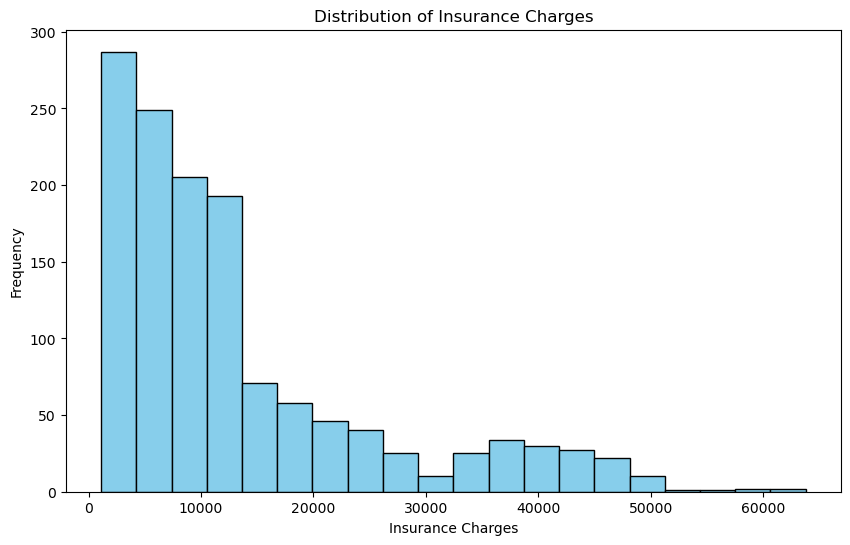

In [11]:
import matplotlib.pyplot as plt

# Plot a histogram of the insurance charges
plt.figure(figsize=(10, 6))
plt.hist(df['charges'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Insurance Charges')
plt.ylabel('Frequency')
plt.show()


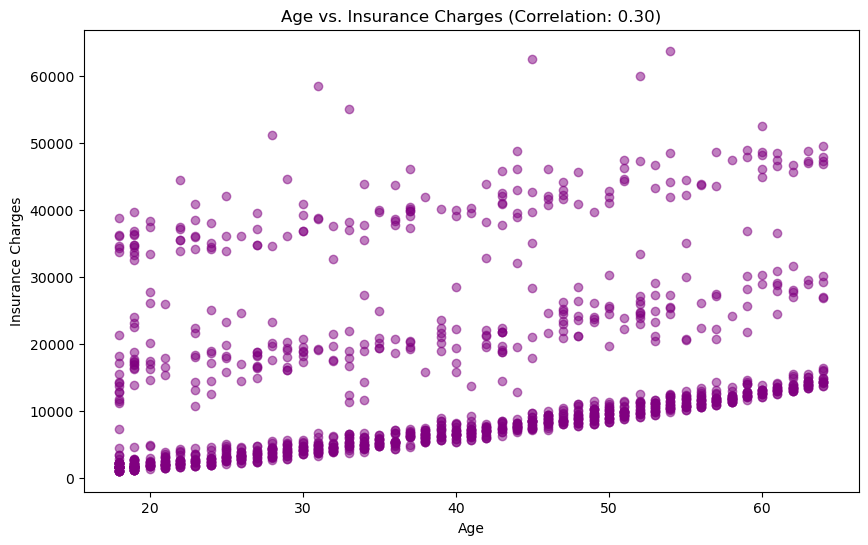

Correlation between age and insurance charges: 0.29900819333064765


In [12]:
# Calculate the correlation between age and charges
age_charges_correlation = df['age'].corr(df['charges'])

# Plot a scatter plot of age vs. charges
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['charges'], color='purple', alpha=0.5)
plt.title(f'Age vs. Insurance Charges (Correlation: {age_charges_correlation:.2f})')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()

# Display the correlation result
print("Correlation between age and insurance charges:", age_charges_correlation)


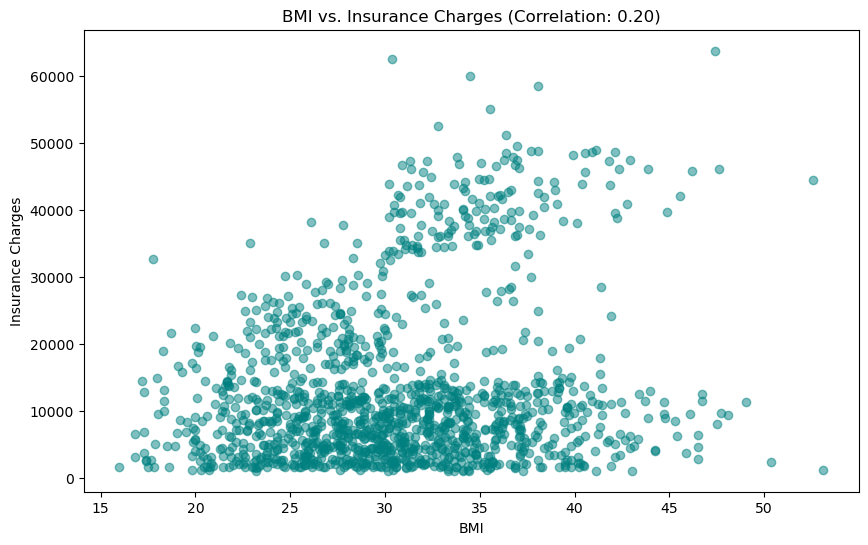

Correlation between BMI and insurance charges: 0.1983409688336289


In [21]:
# Calculate the correlation between BMI and charges
bmi_charges_correlation = df['bmi'].corr(df['charges'])



plt.figure(figsize=(10, 6))
plt.scatter(df['bmi'], df['charges'], color='teal', alpha=0.5)
plt.title(f'BMI vs. Insurance Charges (Correlation: {bmi_charges_correlation:.2f})')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.show()

# Display the correlation result
print("Correlation between BMI and insurance charges:", bmi_charges_correlation)


In [23]:
# Calculate the average insurance charge for each gender
average_charges_by_gender = df.groupby('sex')['charges'].mean()

# Display the results
print("Average insurance charges for males vs. females:")
print(average_charges_by_gender)


Average insurance charges for males vs. females:
sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


In [25]:
# Calculate the average insurance charge for smokers and non-smokers
average_charges_by_smoking_status = df.groupby('smoker')['charges'].mean()

# Display the results
print("Average insurance charges for smokers vs. non-smokers:")
print(average_charges_by_smoking_status)


Average insurance charges for smokers vs. non-smokers:
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


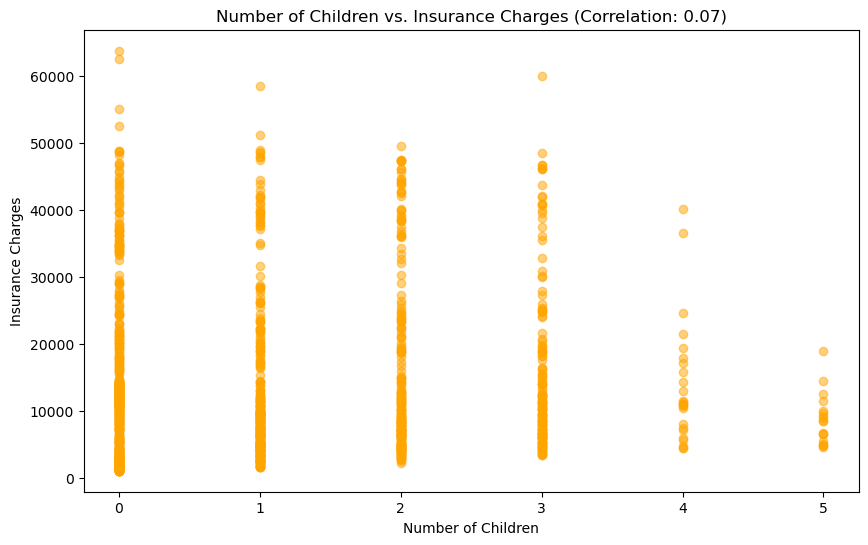

Correlation between number of children and insurance charges: 0.06799822684790487


In [27]:
# Calculate the correlation between the number of children and insurance charges
children_charges_correlation = df['children'].corr(df['charges'])

# Plot a scatter plot of children vs. charges
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['children'], df['charges'], color='orange', alpha=0.5)
plt.title(f'Number of Children vs. Insurance Charges (Correlation: {children_charges_correlation:.2f})')
plt.xlabel('Number of Children')
plt.ylabel('Insurance Charges')
plt.show()

# Display the correlation result
print("Correlation between number of children and insurance charges:", children_charges_correlation)


In [29]:
# Calculate the average insurance charge for each region
average_charges_by_region = df.groupby('region')['charges'].mean()

# Find the region with the highest average charge
highest_average_region = average_charges_by_region.idxmax()
highest_average_charge = average_charges_by_region.max()

# Display the results
print("Average insurance charges by region:")
print(average_charges_by_region)
print(f"\nRegion with the highest average charge: {highest_average_region} with an average charge of {highest_average_charge:.2f}")


Average insurance charges by region:
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

Region with the highest average charge: southeast with an average charge of 14735.41


In [31]:
# Calculate the average insurance charge for smokers and non-smokers in each region
average_charges_by_smoking_region = df.groupby(['smoker', 'region'])['charges'].mean()

# Display the results
print("Average insurance charges by smoking status and region:")
print(average_charges_by_smoking_region)


Average insurance charges by smoking status and region:
smoker  region   
no      northeast     9165.531672
        northwest     8556.463715
        southeast     8032.216309
        southwest     8019.284513
yes     northeast    29673.536473
        northwest    30192.003182
        southeast    34844.996824
        southwest    32269.063494
Name: charges, dtype: float64


In [33]:
# Calculate the percentage of smokers within each gender group
smoking_percentage_by_gender = df.groupby('sex')['smoker'].value_counts(normalize=True).unstack() * 100

# Display the results
print("Percentage of smokers among males and females:")
print(smoking_percentage_by_gender['yes'])


Percentage of smokers among males and females:
sex
female    17.371601
male      23.520710
Name: yes, dtype: float64


In [35]:
# Define the charge threshold
charge_threshold = 20000

# Filter individuals with charges above the threshold
high_cost_individuals = df[df['charges'] > charge_threshold]

# Calculate the average BMI, age, and smoking status
average_bmi = high_cost_individuals['bmi'].mean()
average_age = high_cost_individuals['age'].mean()
smoking_status_counts = high_cost_individuals['smoker'].value_counts(normalize=True) * 100

# Display the results
print(f"Average BMI of individuals with charges above ${charge_threshold}: {average_bmi:.2f}")
print(f"Average age of individuals with charges above ${charge_threshold}: {average_age:.2f}")
print("Smoking status distribution of individuals with high charges:")
print(smoking_status_counts)


Average BMI of individuals with charges above $20000: 32.11
Average age of individuals with charges above $20000: 42.46
Smoking status distribution of individuals with high charges:
smoker
yes    77.655678
no     22.344322
Name: proportion, dtype: float64


In [37]:
# Calculate the distribution of the number of children
children_count_distribution = df['children'].value_counts().sort_index()

# Display the results
print("Distribution of the number of children:")
print(children_count_distribution)


Distribution of the number of children:
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


In [39]:


# Define age bins and labels
age_bins = [0, 30, 45, 60, 75, 90]  # Adjust as needed
age_labels = ['18-30', '31-45', '46-60', '61-75', '76+']

# Create a new column for age groups
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the average insurance charge for each age group
average_charges_by_age_group = df.groupby('age_group')['charges'].mean()

# Display the results
print("Average insurance charges by age group:")
print(average_charges_by_age_group)


Average insurance charges by age group:
age_group
18-30     9182.487125
31-45    12490.912530
46-60    15922.929285
61-75    21248.021885
76+               NaN
Name: charges, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_43924\1207743988.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_charges_by_age_group = df.groupby('age_group')['charges'].mean()


Coefficients:
Age coefficient: 223.7965314638032
BMI coefficient: 330.7944886846065
Intercept: -5571.083408548651


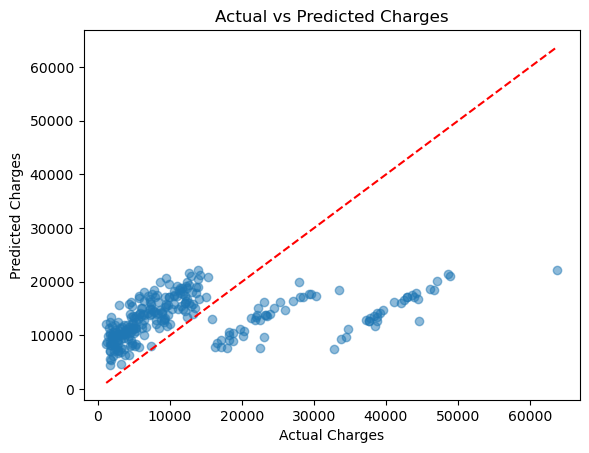

R-squared: 0.1533569292467798


In [41]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare the data
X = df[['age', 'bmi']]  # Independent variables (age and BMI)
y = df['charges']       # Dependent variable (charges)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the charges for the test set
y_pred = model.predict(X_test)

# Print the coefficients
print("Coefficients:")
print("Age coefficient:", model.coef_[0])
print("BMI coefficient:", model.coef_[1])
print("Intercept:", model.intercept_)

# Visualize the predictions
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.show()

# Calculate the model's performance
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)
